In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

df = pd.read_csv('netflix_titles.csv')

print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

  date_added  release_year rating   duration  \
0  25-Sep-21          2020  PG-13     90 min   
1  24-Sep-21          2021  TV-MA  2 Seasons   
2  24-Sep-21          2021  TV-MA   1 Season   
3  24-Se

In [42]:
df.drop_duplicates(inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24-Sep-21,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",9-Mar-16,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7976 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7976 non-null   object
 1   type          7976 non-null   object
 2   title         7976 non-null   object
 3   director      7976 non-null   object
 4   cast          7976 non-null   object
 5   country       7976 non-null   object
 6   date_added    7967 non-null   object
 7   release_year  7976 non-null   int64 
 8   rating        7973 non-null   object
 9   duration      7973 non-null   object
 10  listed_in     7976 non-null   object
 11  description   7976 non-null   object
dtypes: int64(1), object(11)
memory usage: 810.1+ KB


In [44]:
df = df.copy() 

df["director"] = df["director"].fillna('')
df["cast"] = df["cast"].fillna('')
df = df[df["country"].fillna("").str.strip() != ""].copy()
filtered_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",24-Sep-21,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,24-Sep-21,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",9-Mar-16,2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,20-Nov-19,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,1-Nov-19,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,11-Jan-20,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [45]:
filtered_df.to_csv('netflix_filtered_titles.csv', index=False)

In [46]:
# "new_netflix_titles.csv" is the reviewed file of "netflix_filtered_titles.csv" in power query

df2 = pd.read_csv('new_netflix_titles.csv')
df2

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in.1,listed_in.2,listed_in.3,description
0,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,9/24/2021,2021,TV-MA,2 Seasons,International TV Shows,TV Dramas,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,9/24/2021,2021,TV-MA,2 Seasons,International TV Shows,Romantic TV Shows,TV Comedies,In a city of coaching centers known to train I...
2,s8,Movie,Sankofa,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",9/24/2021,1993,TV-MA,125 min,Dramas,Independent Movies,International Movies,"On a photo shoot in Ghana, an American model s..."
3,s10,Movie,The Starling,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,9/24/2021,2021,PG-13,104 min,Comedies,Dramas,NaN,A woman adjusting to life after a loss contend...
4,s13,Movie,Je Suis Karl,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic",9/23/2021,2021,TV-MA,127 min,Dramas,International Movies,NaN,After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4970,s8802,Movie,Zinzana,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan",3/9/2016,2015,TV-MA,96 min,Dramas,International Movies,Thrillers,Recovering alcoholic Talal wakes up inside a s...
4971,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,11/20/2019,2007,R,158 min,Cult Movies,Dramas,Thrillers,"A political cartoonist, a crime reporter and a..."
4972,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,11/1/2019,2009,R,88 min,Comedies,Horror Movies,NaN,Looking to survive in a world taken over by zo...
4973,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,1/11/2020,2006,PG,88 min,Children & Family Movies,Comedies,NaN,"Dragged from civilian life, a former superhero..."


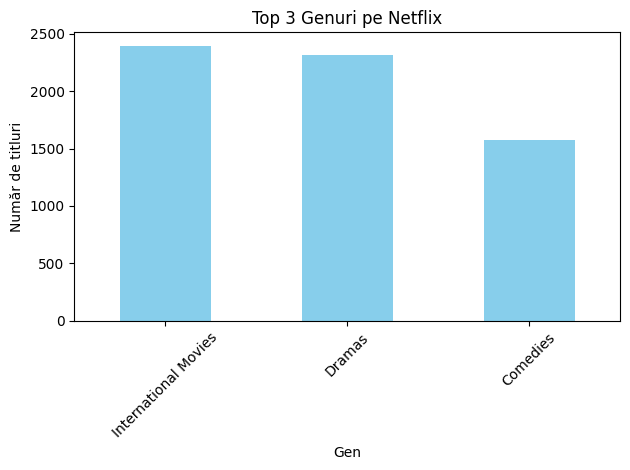

In [47]:
all_genres = pd.concat([
    df2['listed_in.1'],
    df2['listed_in.2'],
    df2['listed_in.3']
]).dropna().str.strip()

genre_counts = all_genres.value_counts()

df2_top_3_genres = genre_counts.head(3)
df2_top_3_genres.plot(kind='bar', color='skyblue')
plt.title('Top 3 Genuri pe Netflix')
plt.xlabel('Gen')
plt.ylabel('Număr de titluri')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

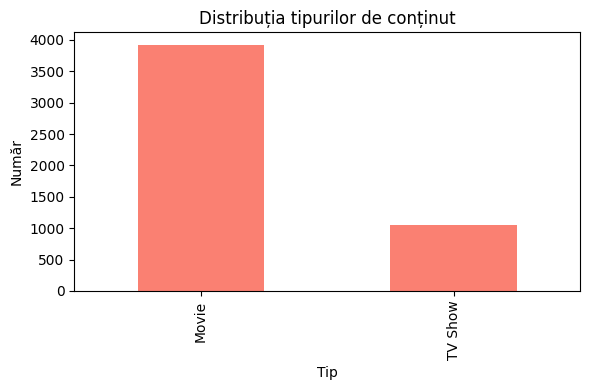

In [48]:
# Vizualizare tipuri de continut
plt.figure(figsize=(6, 4))
df2['type'].value_counts().plot(kind='bar', color='salmon')
plt.title('Distribuția tipurilor de conținut')
plt.xlabel('Type')
plt.ylabel('Number')
plt.tight_layout()
plt.show()

In [49]:
# SQL interogation. Number of titles by type of show.
conn = sqlite3.connect(':memory:')
df2 = df2[df2['type'].notna()]
df2.to_sql('netflix', conn, index=False, if_exists='replace')

query = """
SELECT type, COUNT(*) as count
FROM netflix
GROUP BY type
ORDER BY count DESC
"""

result = pd.read_sql_query(query, conn)
print(result)

      type  count
0    Movie   3924
1  TV Show   1051
